In [21]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset linear regression multiple
Dans notre Projet nous avons fait le choix de générer un DataSet avec l'importation de la fonction #make_regression qui va nous générer le dataset que nous désirons (avec la forme que je voulons mettre en pratique dans notre implémentation, c'est à dire un DataSet Lineaire à plusieurs dimensions à l'occurence 2 dans notre cas de figure) de manière alératoire 

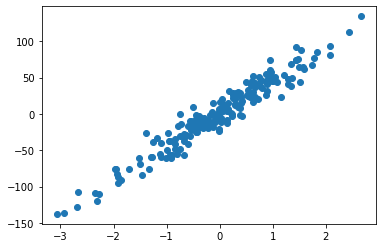

In [22]:
x, y = make_regression(n_samples=200, n_features=2, noise=10) 
#y = y + abs(y/2)

plt.scatter(x[:,0], y)


In [23]:
#Vérification des Dimensions
print(x.shape)
print(y.shape)

#Redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(200, 2)
(200,)
(200, 1)


In [24]:
# Creation de notre matrice X, biais inclut
X = np.hstack((x, np.ones((x.shape[0], 1)))) # converne la matrice avec  deux features
print(X.shape)
print(X[:10])


(200, 3)
[[-0.667951   -0.46752113  1.        ]
 [-0.44963822 -0.63061905  1.        ]
 [ 0.05721755 -0.83849717  1.        ]
 [-0.00982245 -0.37238068  1.        ]
 [ 0.89657121  0.31350429  1.        ]
 [ 1.49806828  1.11960061  1.        ]
 [ 0.05509179 -0.10438977  1.        ]
 [ 0.25849317  0.5916547   1.        ]
 [-0.91538998 -1.26635414  1.        ]
 [ 0.63634123 -0.79683254  1.        ]]


In [25]:
#Initialisation du vecteur theta
theta = np.random.randn(3, 1)
theta

array([[0.04077155],
       [1.04176833],
       [0.23679972]])

# 2. Modele Linéaire
On implemente un Modèle F = X.Ө et on teste s'il n'y a pas de bug sur notre Modèle. De plus, cela permet de voir à quoi ressemble le Modèle initial, défini par la valeur de Ө

In [26]:
def model(X, theta):
    return X.dot(theta)

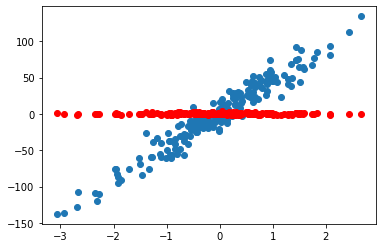

In [27]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta), c="r")

# 3. Fonction coût : Erreur quadratique Moyenne
On mesure les erreurs du modele sur le DataSet X,y en implementant l'erreur quadratique moyenne

j(Ө) = 1/2m Σ(X.Ө - y)²

puis on fait le teste afin de vérifier s'il n'y a pas de bug


In [28]:
def function_cost(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [29]:
function_cost(X, y, theta)

1137.362519431794

# 4. Gradients et Descente de Gradient

On implemente le formule de Gradient pour l'erreur quadratique moyenne

Əj(Ө)/ƏӨ = 1/mX.T(X.Ө - y)

Ensuite, on utilise cette fonction dans la descente de Gradient

Ө = Ө - α(Əj(Ө)/ƏӨ)

In [30]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [31]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # Creation d'un tableau de stockage pour enregistrer l'evolution du coût du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) #Mise à jour du parametre theta(formule du gradient descent)
        cost_history[i] = function_cost(X, y, theta) #On enregistre le valeur du coût i dans cost_histor[i]
        
    return theta, cost_history

# 5. Learning 
On defini le nombre d'ITERATIONS ainsi que le PAS d"apprentissage α et on êut par la suite commencer

Une fois le modele entrainé, on observe les resultats par rapport à notre dataSet

In [32]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000 )

In [33]:
theta_final # Les parametres du modele une fois que la machine a été entrainée

array([[45.82151406],
       [ 7.18168712],
       [ 0.82700783]])

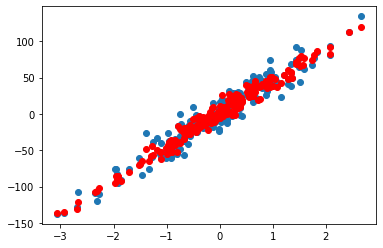

In [34]:
#Creation d'un vecteur predictions qui contient les predictions de notre modele finale 
predictions = model(X, theta_final)

#affichage de predictions en rouge par rapport à notre dataset
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c="r")

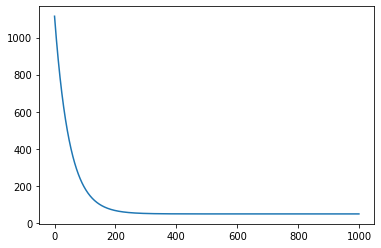

In [35]:
plt.plot(range(1000), cost_history)

# 6. Notre coeficient de détermonation
Evaluation de la performance finale de notre modele

In [36]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [37]:
coef_determination(y, predictions)

0.9578370400450029

# 7. Visualisation en 3D de notre 


<IPython.core.display.Javascript object>


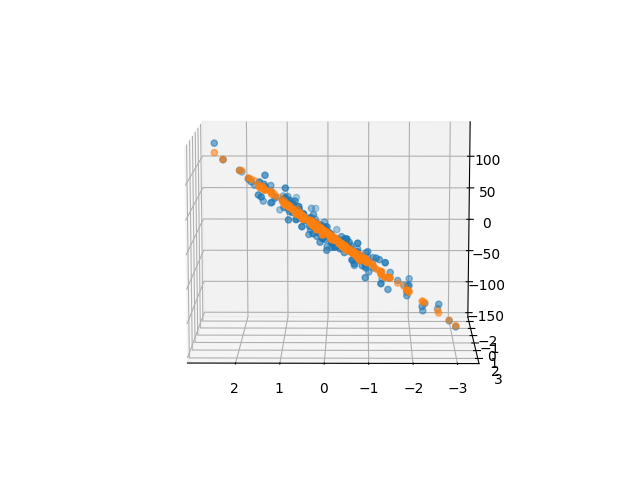

In [38]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)